# **1. Preparing Steps**


## **1.1 Install libraries**


In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install graphviz
!pip install plotly
!pip install nbformat
!pip install joblib
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
import plotly.express as px
import plotly.graph_objects as go
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## **1.2 Helper Functions**


In [3]:
def load_data():
    """
    Load and preprocess the Heart Disease dataset.

    This function reads the heart.csv file, shuffles the dataset for randomness,
    and separates the features and labels for supervised learning.

    Returns:
        tuple:
            - features (pandas.DataFrame): The feature data.
            - labels (pandas.Series): The target labels (0 or 1).
            - feature_names (list): A list of column names for the features.
    """
    # Đọc file CSV
    df = pd.read_csv("dataset/heart.csv")

    # Lấy nhãn và đặc trưng
    features = df.drop("target", axis=1)
    labels = df["target"]
    feature_names = features.columns.tolist()

    # Shuffle toàn bộ dữ liệu
    features_shuffle, labels_shuffle = shuffle(features, labels, random_state=42)

    return features_shuffle, labels_shuffle, feature_names

In [4]:
def split_data(features, labels, train_size, test_size):
    """
    Split the Heart Disease dataset into training and testing sets.

    This function splits the input features and labels (from heart.csv)
    into training and testing sets based on the specified proportions.
    The split is stratified to preserve class distribution.

    Args:
        features (pandas.DataFrame): The feature data.
        labels (pandas.Series): The target labels.
        train_size (float): Proportion of data for training.
        test_size (float): Proportion of data for testing.

    Returns:
        tuple:
            - feature_train (pandas.DataFrame): Training features.
            - feature_test (pandas.DataFrame): Testing features.
            - label_train (pandas.Series): Training labels.
            - label_test (pandas.Series): Testing labels.
    """
    feature_train, feature_test, label_train, label_test = train_test_split(
        features,
        labels,
        train_size=train_size,
        test_size=test_size,
        stratify=labels,
        random_state=42,
        shuffle=True
    )

    return feature_train, feature_test, label_train, label_test

In [5]:
def create_datasets(features, labels, split_ratios):
    """
    Create multiple train-test splits from the Heart Disease dataset.

    This function uses different train/test ratios to create
    multiple datasets, stratified to preserve label distribution.

    Args:
        features (pandas.DataFrame): Feature data from heart.csv.
        labels (pandas.Series): Label data (0 or 1).
        split_ratios (list of tuples): Each tuple contains (train_size, test_size), e.g., (0.8, 0.2).

    Returns:
        list of dicts: Each dict contains:
            - 'train_size': float, training size used
            - 'test_size': float, testing size used
            - 'X_train', 'X_test': features
            - 'y_train', 'y_test': labels
    """
    datasets = []

    for train_size, test_size in split_ratios:
        X_train, X_test, y_train, y_test = split_data(
            features, labels, train_size, test_size
        )
        datasets.append({
            "train_size": train_size,
            "test_size": test_size,
            "X_train": X_train,
            "X_test": X_test,
            "y_train": y_train,
            "y_test": y_test,
        })

    return datasets

# **2. Preparing the data sets**


## **2.1 Create training and test sets of different proportions**


In [6]:
features_shuffle, labels_shuffle, features_name = load_data()

In [7]:
features_shuffle.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [8]:
features_shuffle.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [9]:
labels_shuffle.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [10]:
labels_shuffle.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
features_data = features_shuffle.values
labels_data = labels_shuffle.values

In [12]:
# Create datasets with different ratios
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = create_datasets(features_data, labels_data, split_ratios)

## **2.2 Visualize the distribution of classes in all the data sets**


In [13]:
def plot_label_distributions(listDatasets, listProportions, original_labels):
    """
    Visualizes the distribution of labels in original, training, and testing sets
    using grouped bar plots in Plotly.

    Args:
        listDatasets (list of dict): Each dict contains X_train, X_test, y_train, y_test,...
        listProportions (list of tuples): Train/test proportions (e.g., [(0.8, 0.2), ...])
        original_labels (pd.Series or np.array): Original labels before splitting

    Returns:
        None: Displays interactive bar plots
    """
    # Ensure original_labels is flattened (if needed)
    if hasattr(original_labels, "values"):
        original_labels = original_labels.values
    original_labels = original_labels.flatten()

    # Determine label classes
    label_classes = list(np.unique(original_labels))

    # Count original label distribution
    original_counts = pd.Series(original_labels).value_counts().reindex(label_classes, fill_value=0).values

    for i, proportion in enumerate(listProportions):
        # Extract labels
        y_train = listDatasets[i]['y_train']
        y_test = listDatasets[i]['y_test']

        y_train = np.array(y_train).flatten()
        y_test = np.array(y_test).flatten()

        train_counts = pd.Series(y_train).value_counts().reindex(label_classes, fill_value=0).values
        test_counts = pd.Series(y_test).value_counts().reindex(label_classes, fill_value=0).values

        # X-axis and bar width
        x = np.arange(len(label_classes))
        width = 0.25

        # Plotting
        fig = go.Figure()

        fig.add_trace(go.Bar(
            x=x - width,
            y=original_counts,
            width=width,
            name="Original Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[0]
        ))

        fig.add_trace(go.Bar(
            x=x,
            y=train_counts,
            width=width,
            name="Training Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[1]
        ))

        fig.add_trace(go.Bar(
            x=x + width,
            y=test_counts,
            width=width,
            name="Testing Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[2]
        ))

        fig.update_layout(
        title=f"Label Distribution - Split ({int(proportion[0]*100)}% Train, {int(proportion[1]*100)}% Test)",
        xaxis=dict(
            title="Label",
            tickvals=x,
            ticktext=[f"Không bệnh ({label})" if label == 0 else f"Có bệnh ({label})" for label in label_classes]
        ),
        yaxis=dict(title="Count"),
        barmode="group",
        legend_title_text="Dataset"
)
        fig.show()

In [14]:
plot_label_distributions(datasets, split_ratios, labels_data)

# **3. Building the decision tree classifiers**


## **3.1 Training model decision tree classifiers with different split ratios**


In [15]:
import os
def train_and_save_decision_trees(datasets, split_ratios, save_dir="models", random_state=42):
    """
    Huấn luyện các cây quyết định dựa trên các tập train/test tương ứng với nhiều tỷ lệ chia khác nhau.
    Mỗi mô hình được lưu vào file theo định dạng tên tỷ lệ.

    Args:
        datasets (list of dict): Danh sách các dict chứa X_train, y_train, v.v.
        split_ratios (list of tuples): Danh sách các tỷ lệ (train_size, test_size).
        save_dir (str): Thư mục để lưu các mô hình .pkl.
        random_state (int): Seed để đảm bảo tái lập.

    Returns:
        list: Danh sách các mô hình DecisionTreeClassifier đã được huấn luyện.
    """
    trained_models = []

    # Tạo thư mục lưu mô hình nếu chưa có
    os.makedirs(save_dir, exist_ok=True)

    for i, (train_size, test_size) in enumerate(split_ratios):
        data = datasets[i]
        X_train = data["X_train"]
        y_train = data["y_train"]

        # Khởi tạo mô hình
        clf = DecisionTreeClassifier(
            criterion="entropy",
            splitter="best",
            random_state=random_state
        )

        # Huấn luyện mô hình
        clf.fit(X_train, y_train)
        trained_models.append(clf)

        # Đường dẫn lưu file
        filename = f"decision_tree_{int(train_size*100)}_{int(test_size*100)}.pkl"
        filepath = os.path.join(save_dir, filename)

        # Lưu mô hình bằng joblib
        joblib.dump(clf, filepath)

    return trained_models

In [16]:
list_models = train_and_save_decision_trees(datasets, split_ratios)

## **3.2 Visualize decision trees with different split ratios**


In [17]:
def export_and_display_decision_trees(models, split_ratios, feature_names, class_labels, save_dir="output/split_ratios_graphviz"):
    """
    Xuất và hiển thị cây quyết định tương ứng với các mô hình đã huấn luyện,
    theo từng tỷ lệ train/test. Mỗi cây được lưu dưới dạng hình ảnh PNG.

    Args:
        models (list): Danh sách các mô hình DecisionTreeClassifier đã huấn luyện.
        split_ratios (list of tuples): Danh sách các tỷ lệ chia train/test.
        feature_names (list): Tên các thuộc tính đầu vào.
        class_labels (list): Tên tương ứng với các nhãn đầu ra.
        save_dir (str): Thư mục để lưu các biểu đồ cây (PNG).
    """

    os.makedirs(save_dir, exist_ok=True)

    for model, (train_ratio, test_ratio) in zip(models, split_ratios):
        # Chuyển đổi cây thành định dạng DOT
        dot = export_graphviz(
            model,
            feature_names=feature_names,
            class_names=class_labels,
            filled=True,
            rounded=True,
            special_characters=True
        )

        # Tạo biểu đồ từ DOT
        tree_graph = graphviz.Source(dot)
        tree_graph.engine = "dot"

        # Đường dẫn lưu file
        filename = f"tree_{int(train_ratio*100)}_{int(test_ratio*100)}"
        filepath = os.path.join(save_dir, filename)

        # Xuất ảnh
        tree_graph.render(filepath, format="png", cleanup=True)

        # Hiển thị trực tiếp trong notebook
        display(tree_graph)

        print(f"✓ Tree saved for split {int(train_ratio*100)}:{int(test_ratio*100)} → {filepath}.png")

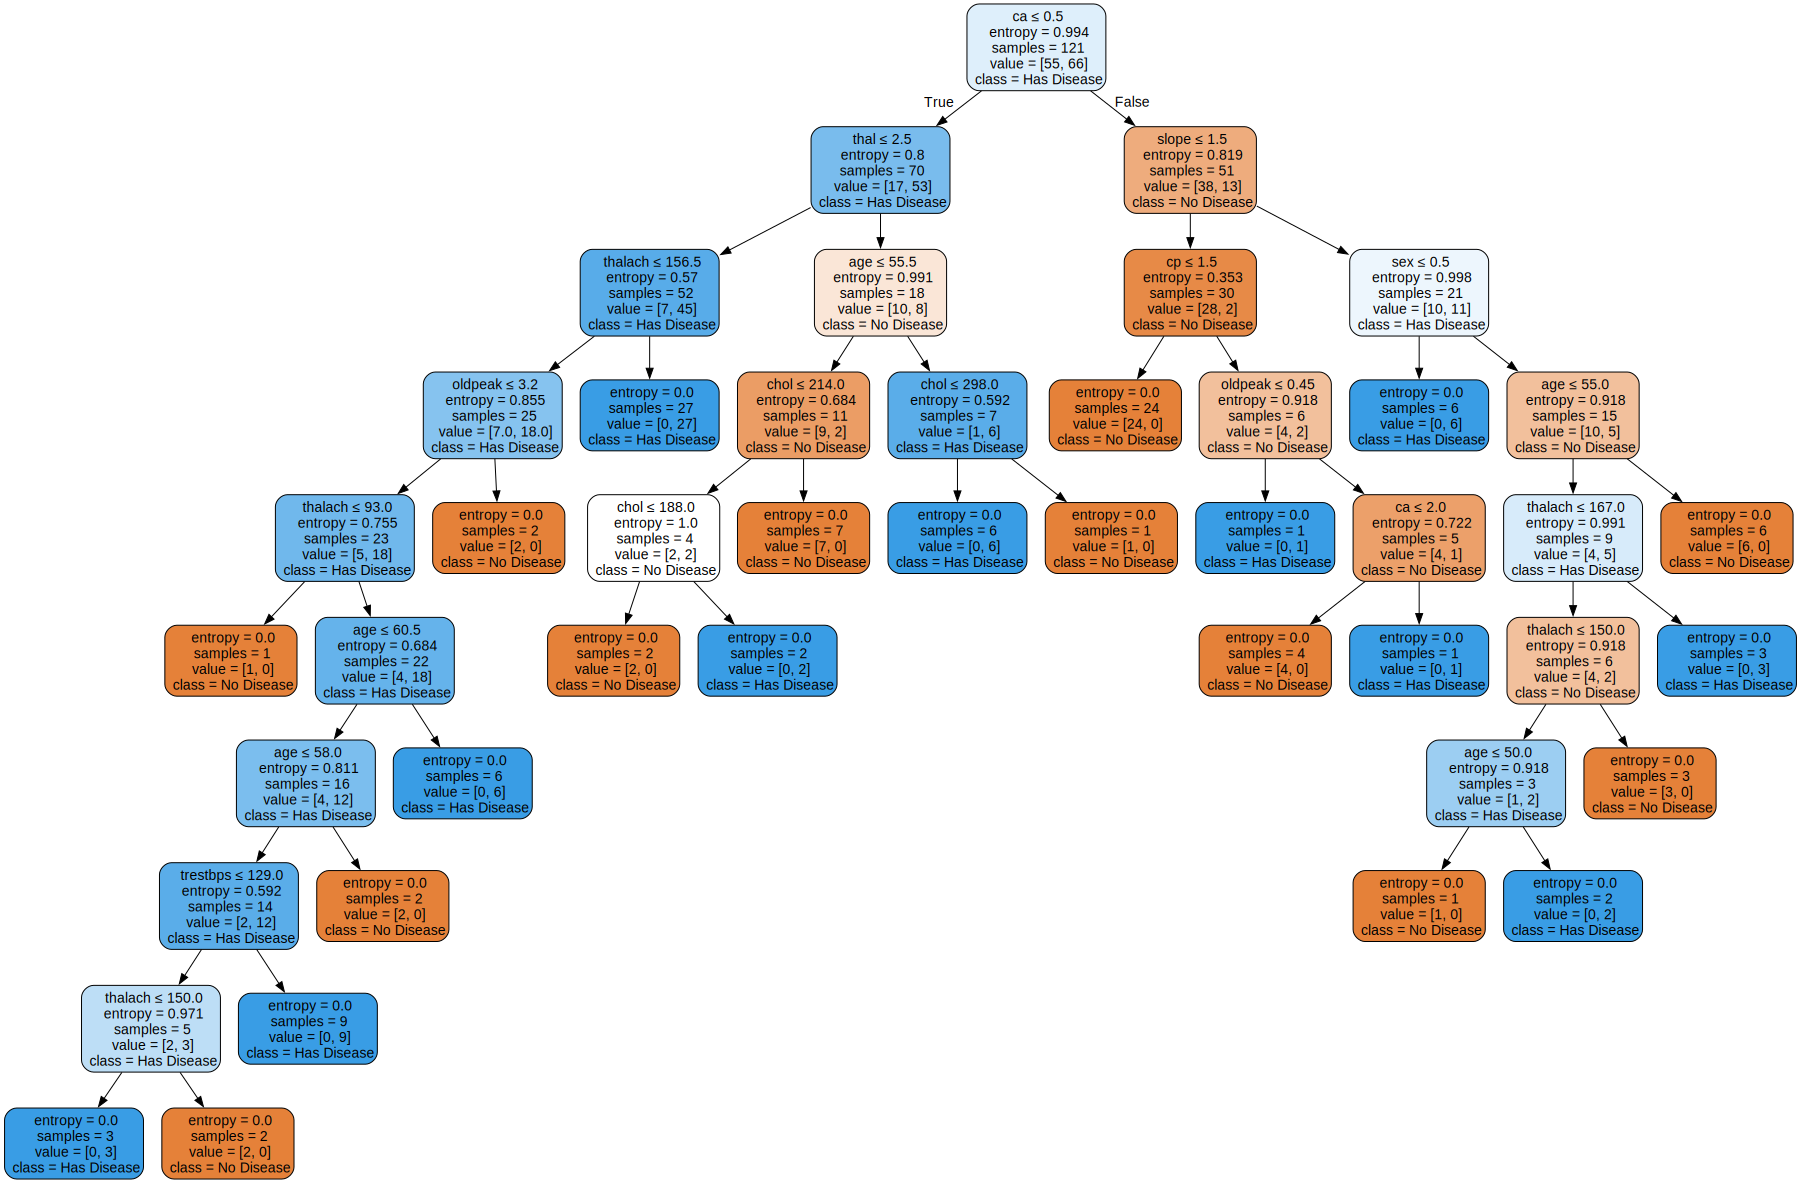

✓ Tree saved for split 40:60 → output/split_ratios_graphviz\tree_40_60.png


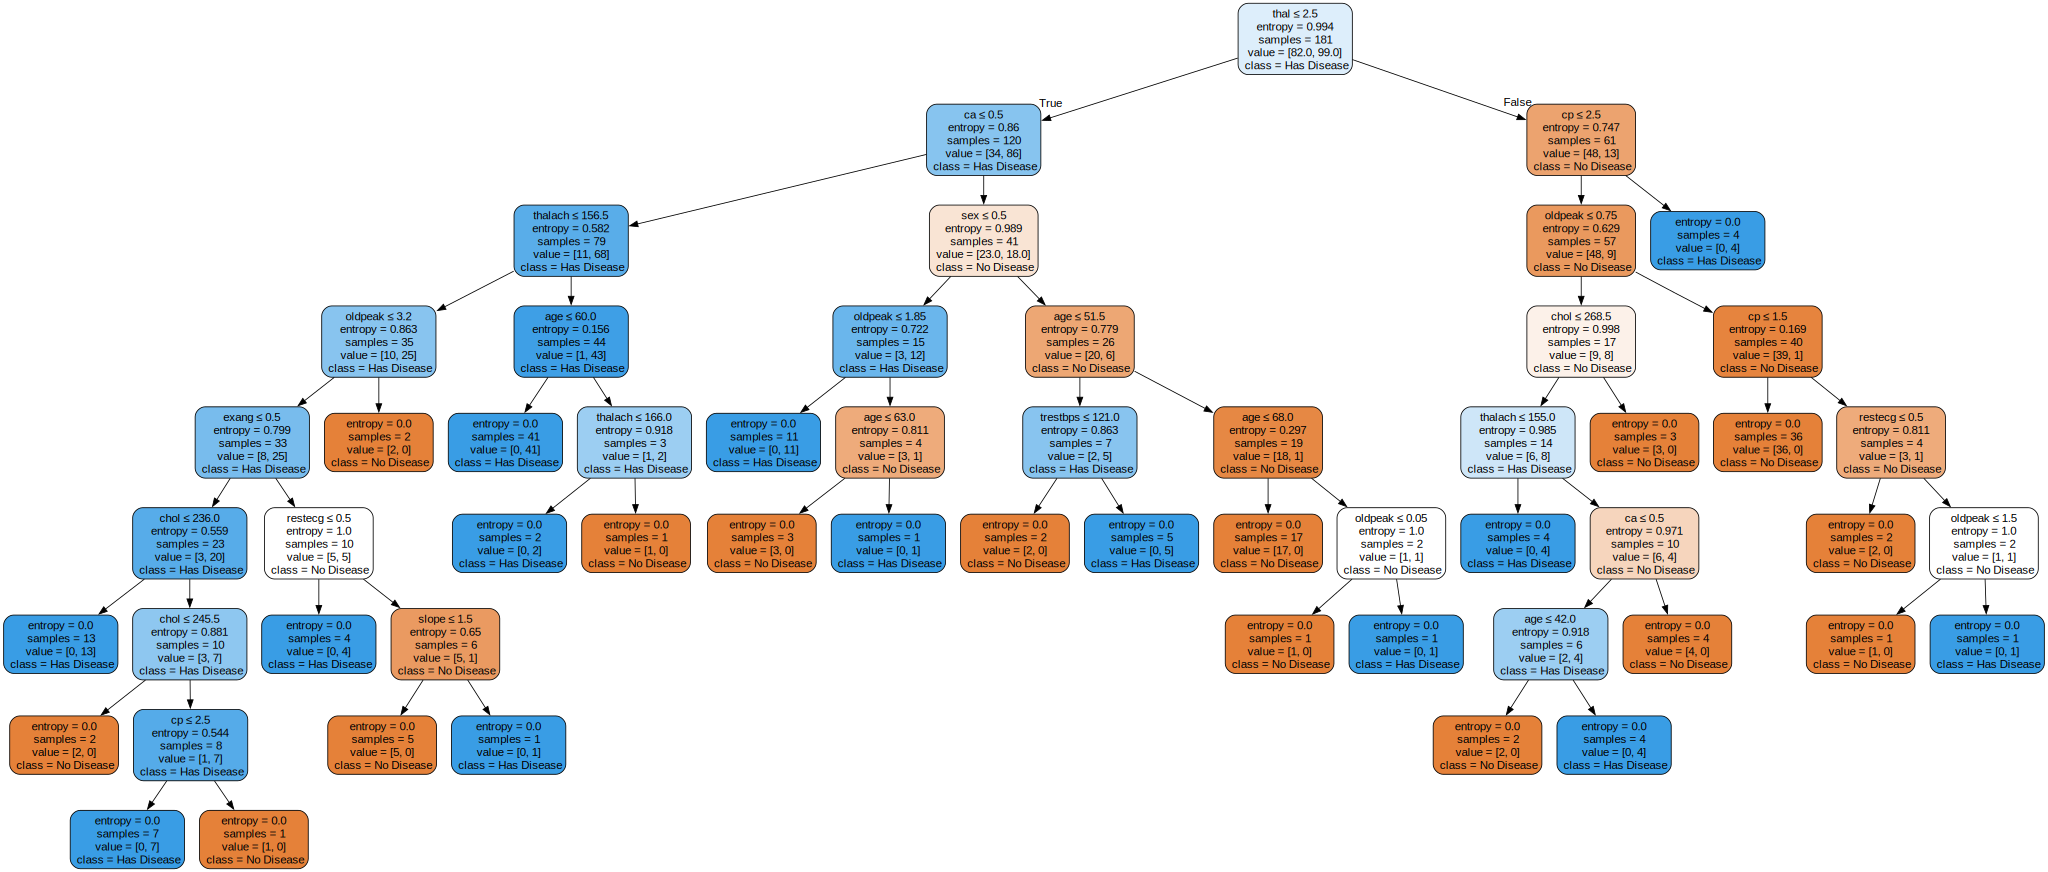

✓ Tree saved for split 60:40 → output/split_ratios_graphviz\tree_60_40.png


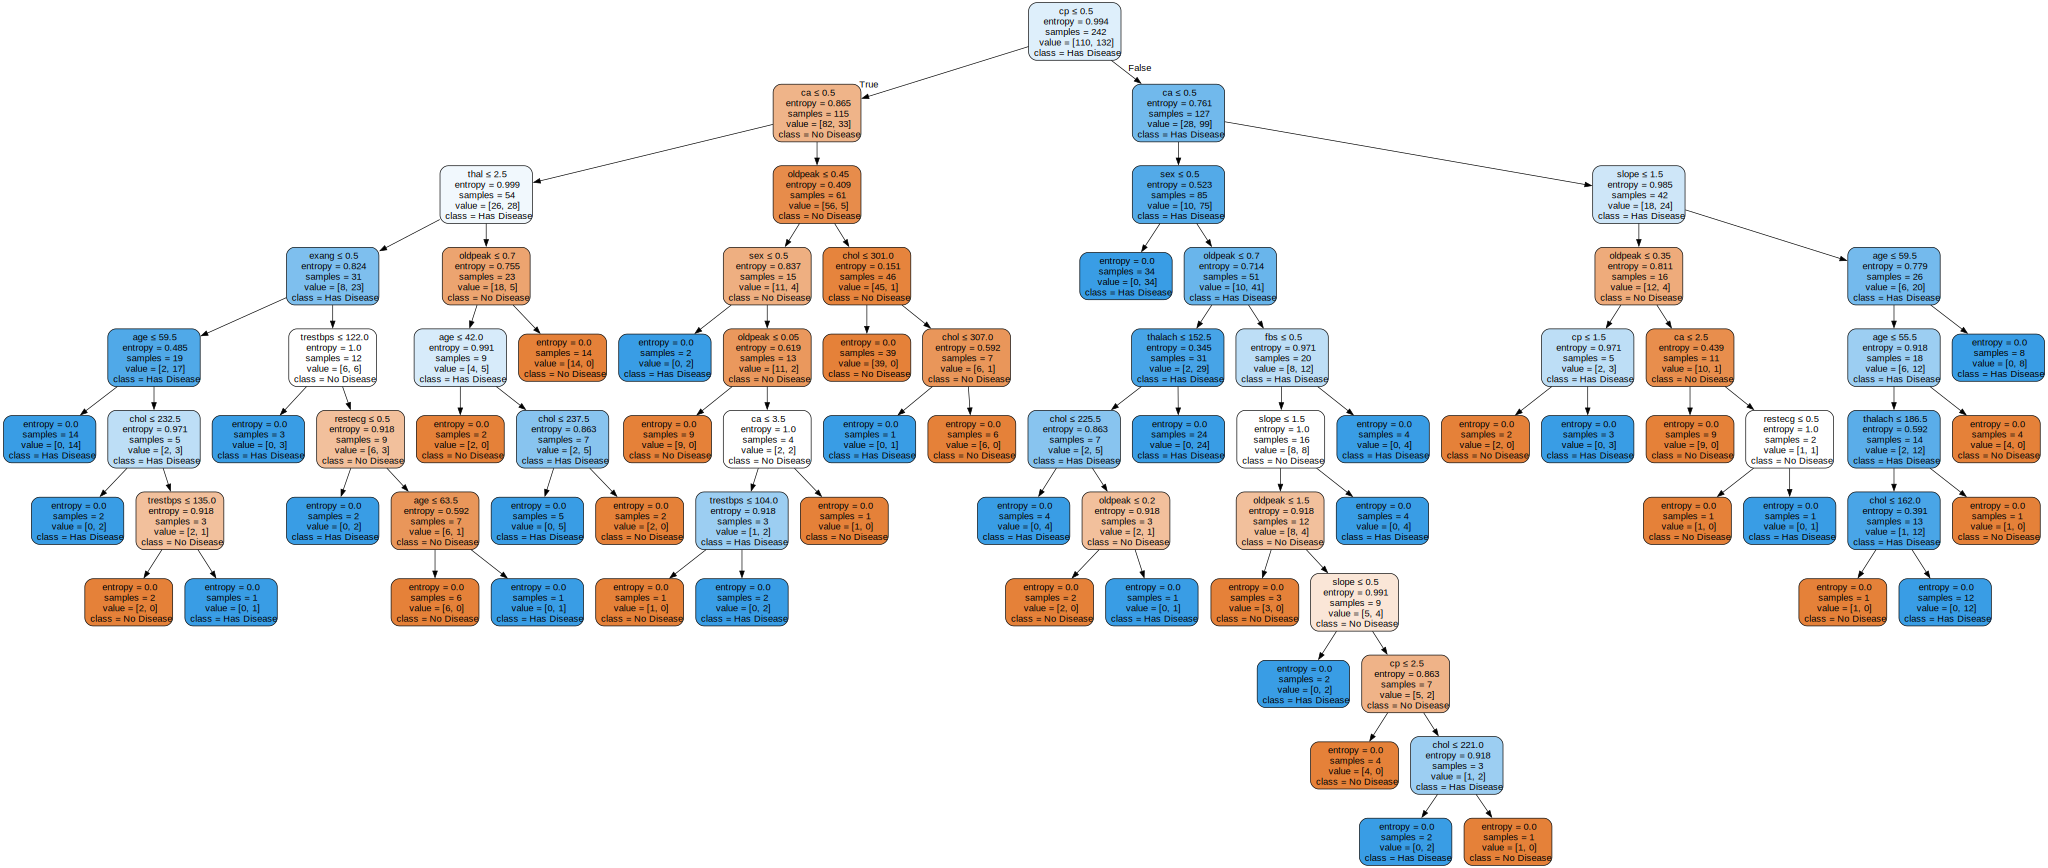

✓ Tree saved for split 80:20 → output/split_ratios_graphviz\tree_80_20.png


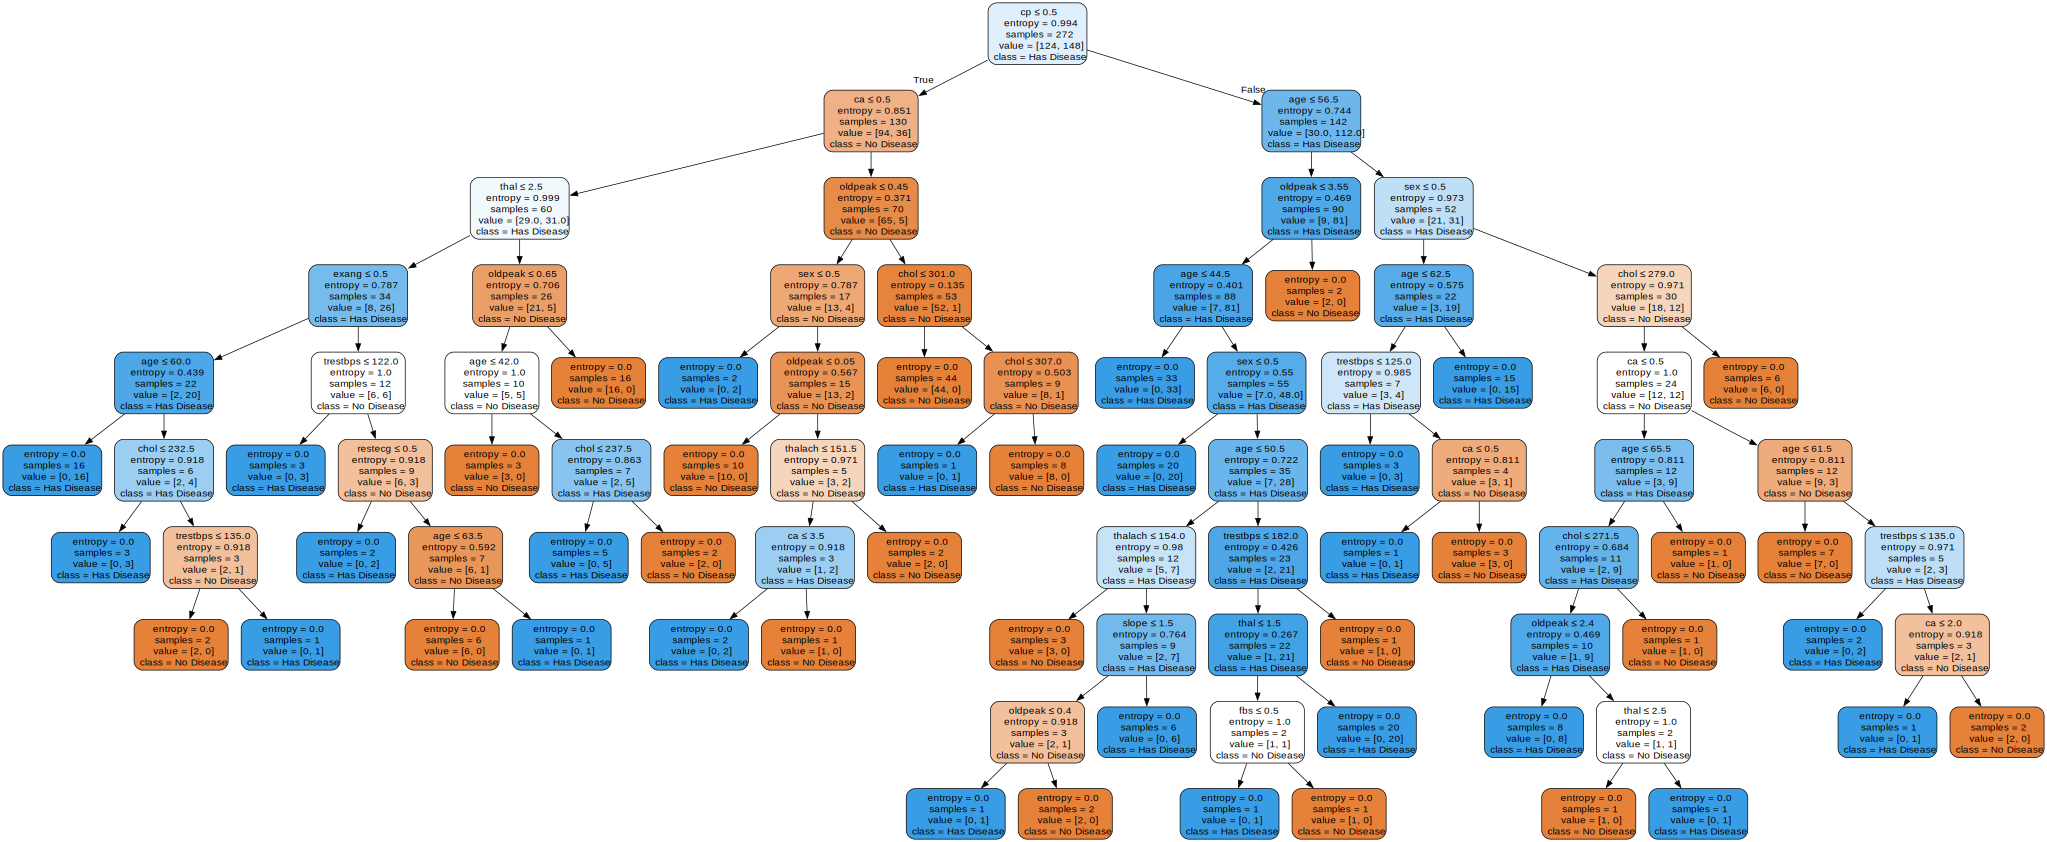

✓ Tree saved for split 90:10 → output/split_ratios_graphviz\tree_90_10.png


In [18]:
class_name = ["No Disease", "Has Disease"]
export_and_display_decision_trees(list_models, split_ratios, features_name, class_name)

# **4. Evaluating the decision tree classifiers**

## **4.1 Visualize confusion matrix and classification report**


In [19]:
import os

def evaluate_and_visualize_models(models, datasets, split_ratios, save_dir="output/report/split_ratios_ver"):
    """
    Đánh giá danh sách mô hình và trực quan hóa classification report + confusion matrix.
    Lưu kết quả dưới dạng ảnh PNG, tránh lỗi khi mô hình chỉ dự đoán 1 class.

    Args:
        models (list): Các mô hình đã huấn luyện.
        datasets (list): Danh sách dict chứa X_test, y_test,...
        split_ratios (list): Danh sách các tỷ lệ chia train/test.
        save_dir (str): Thư mục lưu ảnh đánh giá.
    """
    os.makedirs(save_dir, exist_ok=True)

    for model, data, (train_ratio, test_ratio) in zip(models, datasets, split_ratios):
        X_test = data['X_test']
        y_test = data['y_test']
        y_pred = model.predict(X_test)

        # Tạo classification report dưới dạng text + dict
        report_text = classification_report(y_test, y_pred, digits=4, zero_division=1)
        report_dict = classification_report(y_test, y_pred, digits=4, zero_division=1, output_dict=True)

        matrix = confusion_matrix(y_test, y_pred)

        # ==== Vẽ hình ====
        fig = plt.figure(figsize=(15, 8))

        # --- Vẽ bảng classification report ---
        plt.subplot(1, 2, 1)

        # Lấy các lớp thực tế được dự đoán
        label_keys = [key for key in report_dict.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
        if len(label_keys) < 1:
            print(f"⚠️ Report bị thiếu nhãn! Bỏ qua split {train_ratio}:{test_ratio}")
            continue

        class_labels = label_keys
        data = [[
            f"{report_dict[label]['precision']:.4f}",
            f"{report_dict[label]['recall']:.4f}",
            f"{report_dict[label]['f1-score']:.4f}",
            f"{int(report_dict[label]['support'])}"
        ] for label in class_labels]

        stat_labels = ["accuracy", "macro avg", "weighted avg"]
        stat_data = []

        # accuracy (special case)
        stat_data.append([" ", " ", f"{report_dict['accuracy']:.4f}", " "])

        for label in ["macro avg", "weighted avg"]:
            values = report_dict.get(label)
            if values:
                stat_data.append([
                    f"{values['precision']:.4f}",
                    f"{values['recall']:.4f}",
                    f"{values['f1-score']:.4f}",
                    f"{int(values['support'])}"
                ])

        tbl = plt.table(
            cellText=data,
            colLabels=["Precision", "Recall", "F1-score", "Support"],
            rowLabels=class_labels,
            loc='center',
            cellLoc='center',
            bbox=[0.2, 0.45, 0.6, 0.4]
        )
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(10)

        stat_tbl = plt.table(
            cellText=stat_data,
            rowLabels=stat_labels,
            cellLoc='center',
            bbox=[0.3, 0.02, 0.5, 0.35]
        )
        stat_tbl.auto_set_font_size(False)
        stat_tbl.set_fontsize(10)

        for table in [tbl, stat_tbl]:
            for cell in table.get_celld().values():
                cell.set_edgecolor("white")
                cell.set_text_props(ha="center", va="center")
                cell.set_height(0.1)

        plt.axis("off")
        plt.title("Classification Report")

        # --- Vẽ heatmap Confusion Matrix ---
        plt.subplot(1, 2, 2)
        sns.heatmap(matrix,
                    annot=True,
                    fmt="d",
                    cmap="magma",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_,
                    cbar=True,
                    linewidths=0)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")

        plt.suptitle(f"Decision Tree - Split {int(train_ratio*100)}% / {int(test_ratio*100)}%", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        # Lưu hình
        file_path = os.path.join(save_dir, f"report_model_{int(train_ratio*100)}_{int(test_ratio*100)}.png")
        plt.savefig(file_path)
        plt.show()

        print(f"✓ Evaluation saved: {file_path}")

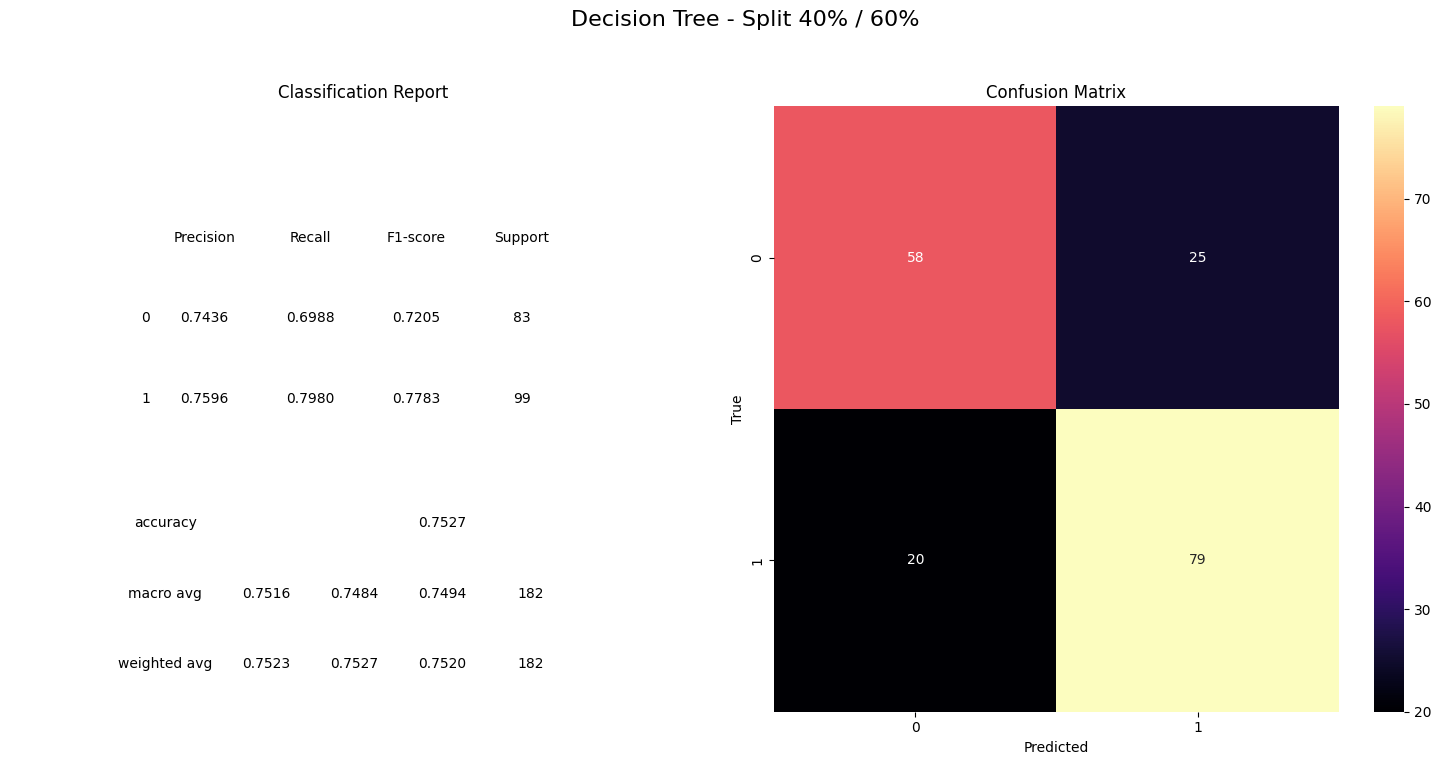

✓ Evaluation saved: output/report/split_ratios_ver\report_model_40_60.png


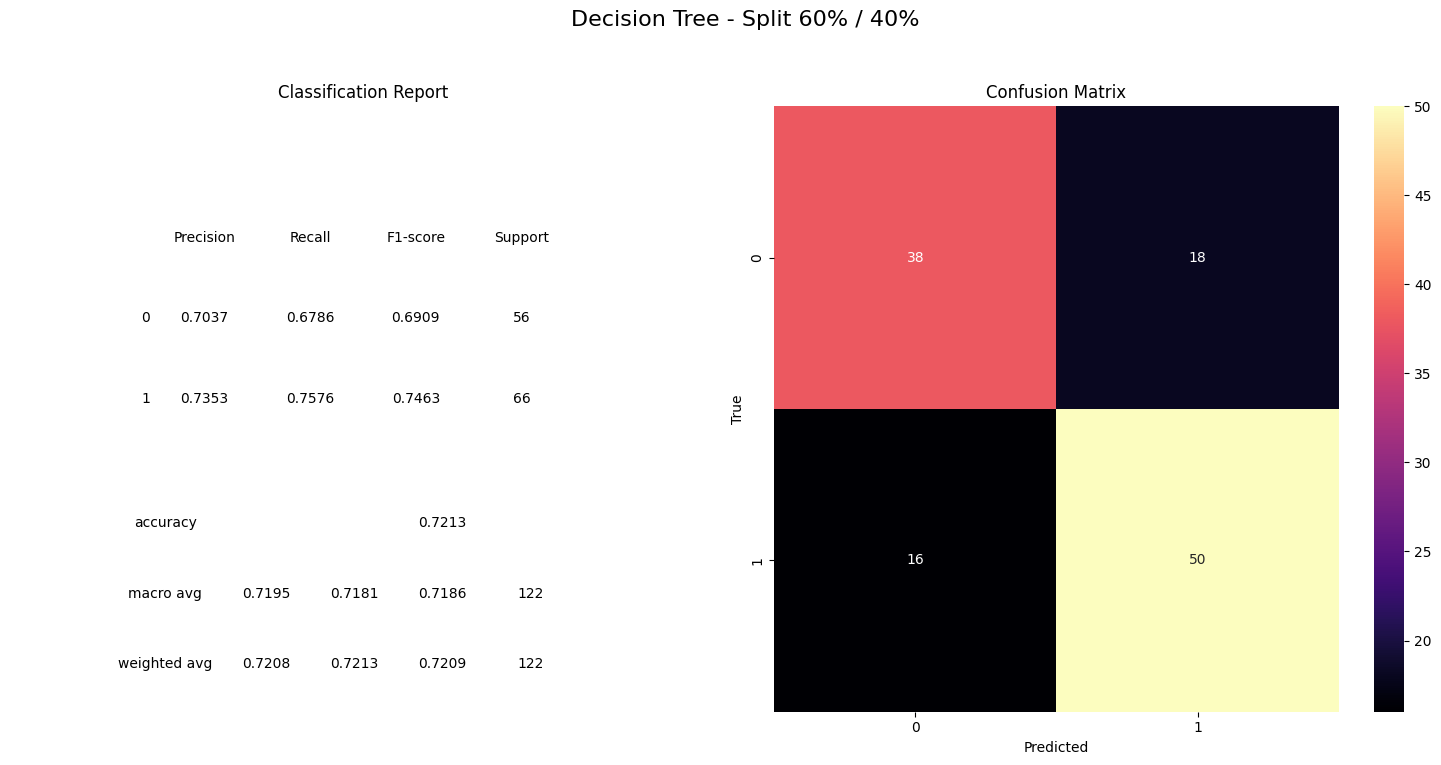

✓ Evaluation saved: output/report/split_ratios_ver\report_model_60_40.png


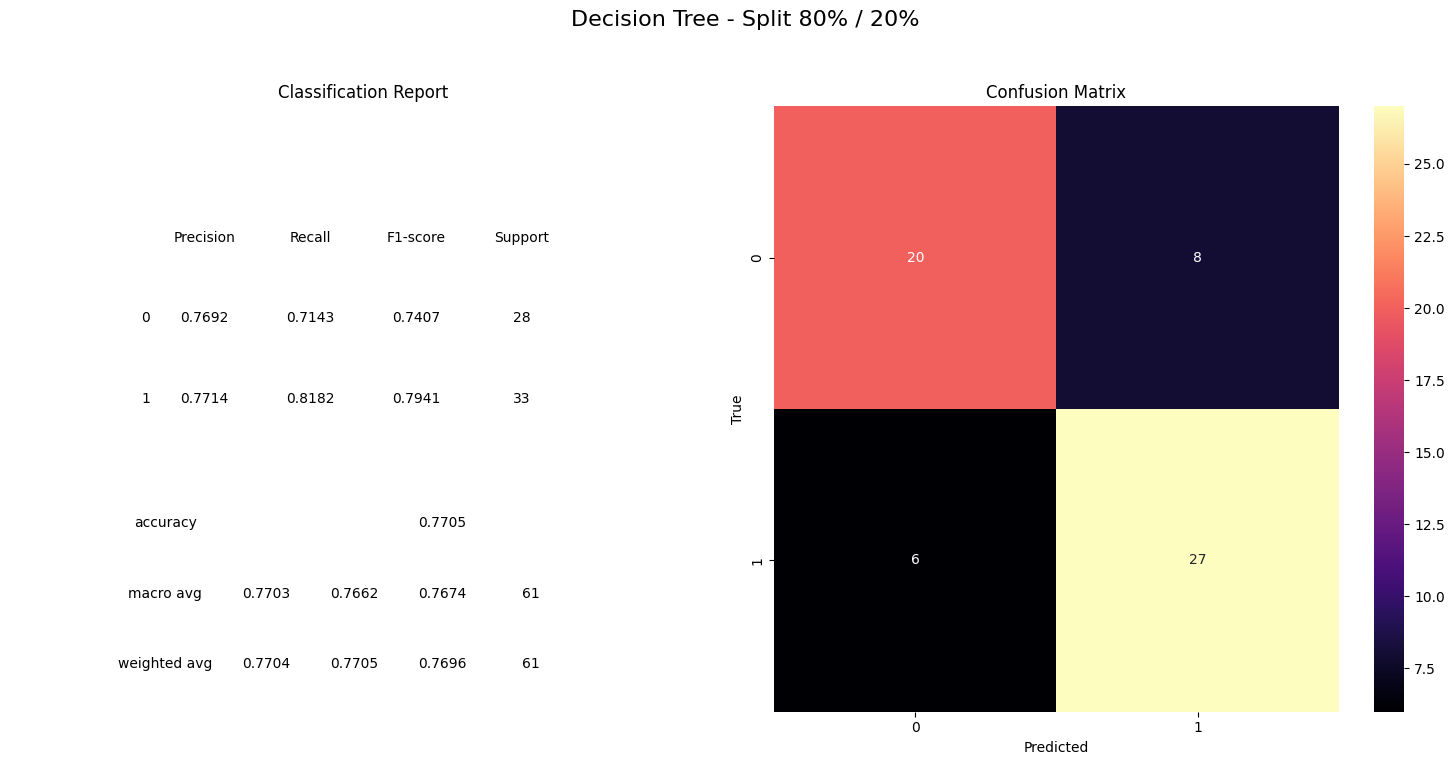

✓ Evaluation saved: output/report/split_ratios_ver\report_model_80_20.png


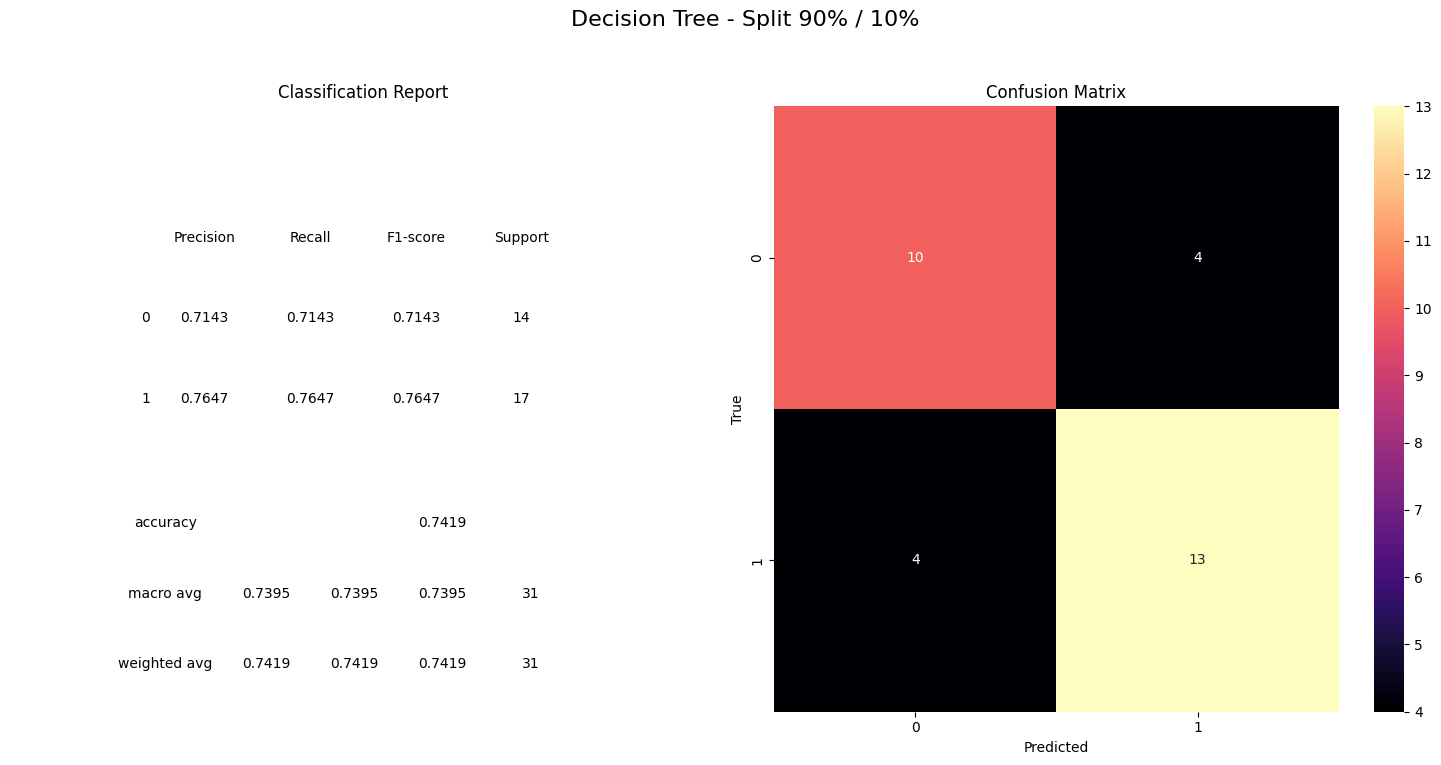

✓ Evaluation saved: output/report/split_ratios_ver\report_model_90_10.png


In [20]:
evaluate_and_visualize_models(list_models, datasets, split_ratios)

# **5. The depth and accuracy of a decision tree**


## **5.1 Training model with max depth of decision tree**


In [21]:
def train_decision_trees_by_depth(datasets, depth_list, save_dir="model/max_depth_ver"):
    """
    Huấn luyện các mô hình Decision Tree với nhiều giá trị độ sâu khác nhau (max_depth)
    và đánh giá độ chính xác trên tập kiểm tra.

    Args:
        datasets (tuple): Bộ dữ liệu train/test (feature_train, feature_test, label_train, label_test).
        depth_list (list): Danh sách các giá trị max_depth cần thử nghiệm.
        save_dir (str): Đường dẫn thư mục lưu mô hình và file kết quả.

    Returns:
        tuple:
            - trained_models (list): Các mô hình huấn luyện.
            - accuracy_by_depth (dict): Ánh xạ từ max_depth sang độ chính xác.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Tách dữ liệu 80/20
    X_train = datasets[2]["X_train"]
    X_test = datasets[2]["X_test"]
    y_train = datasets[2]["y_train"]
    y_test = datasets[2]["y_test"]

    trained_models = []
    accuracy_by_depth = {}

    for depth in depth_list:
        # Huấn luyện mô hình
        clf = DecisionTreeClassifier(
            criterion="entropy",
            max_depth=depth,
            random_state=42
        )
        clf.fit(X_train, y_train)
        trained_models.append(clf)

        # Đánh giá độ chính xác
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_by_depth[depth] = accuracy

        # Lưu mô hình
        model_path = os.path.join(save_dir, f"decision_tree_depth_{depth}.pkl")
        joblib.dump(clf, model_path)
        print(f"✓ Model saved: {model_path}")

    # ===== Lưu kết quả accuracy ra CSV =====
    result_df = pd.DataFrame({
        "max_depth": ["None" if d is None else d for d in accuracy_by_depth.keys()],
        "accuracy": list(accuracy_by_depth.values())
    })
    result_csv_path = os.path.join(save_dir, "accuracy_by_depth.csv")
    result_df.to_csv(result_csv_path, index=False)
    print(f"✓ Accuracy results saved to: {result_csv_path}")

    return trained_models, accuracy_by_depth

In [22]:
list_max_depth = [None, 1, 2, 3, 4, 5, 6, 7]
list_max_depth_model, accuracy_results = train_decision_trees_by_depth(
    datasets, list_max_depth
)

✓ Model saved: model/max_depth_ver\decision_tree_depth_None.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_1.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_2.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_3.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_4.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_5.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_6.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_7.pkl
✓ Accuracy results saved to: model/max_depth_ver\accuracy_by_depth.csv


## **5.2 Visualize decision trees with each `max_depth` value.**


In [23]:
def export_and_display_trees_by_depth(models, depth_list, feature_names, class_labels, save_dir="output/max_depth_graphviz"):
    """
    Trực quan hóa và lưu các cây quyết định tương ứng với các giá trị max_depth khác nhau.

    Args:
        models (list): Danh sách các mô hình DecisionTreeClassifier đã huấn luyện.
        depth_list (list): Danh sách các giá trị max_depth được sử dụng.
        feature_names (list): Tên các đặc trưng được sử dụng trong mô hình.
        class_labels (list): Tên các lớp tương ứng với nhãn đầu ra.
        save_dir (str): Thư mục để lưu các biểu đồ cây dưới dạng PNG.
    """
    os.makedirs(save_dir, exist_ok=True)

    for model, depth in zip(models, depth_list):
        # Chuyển cây thành định dạng DOT
        dot = export_graphviz(
            model,
            feature_names=feature_names,
            class_names=class_labels,
            filled=True,
            rounded=True,
            special_characters=True
        )

        # Tạo đối tượng Graphviz
        tree_graph = graphviz.Source(dot)
        tree_graph.engine = "dot"

        # Tên file lưu
        filename = f"graph_model_80_20_depth_{depth}"
        filepath = os.path.join(save_dir, filename)

        # Xuất file PNG
        tree_graph.render(filepath, format="png", cleanup=True)

        # Hiển thị trực tiếp trong notebook (nếu có)
        display(tree_graph)

        # Thông báo hoàn tất
        print(f"✓ Decision tree (depth={depth}) visualized and saved to {filepath}.png")

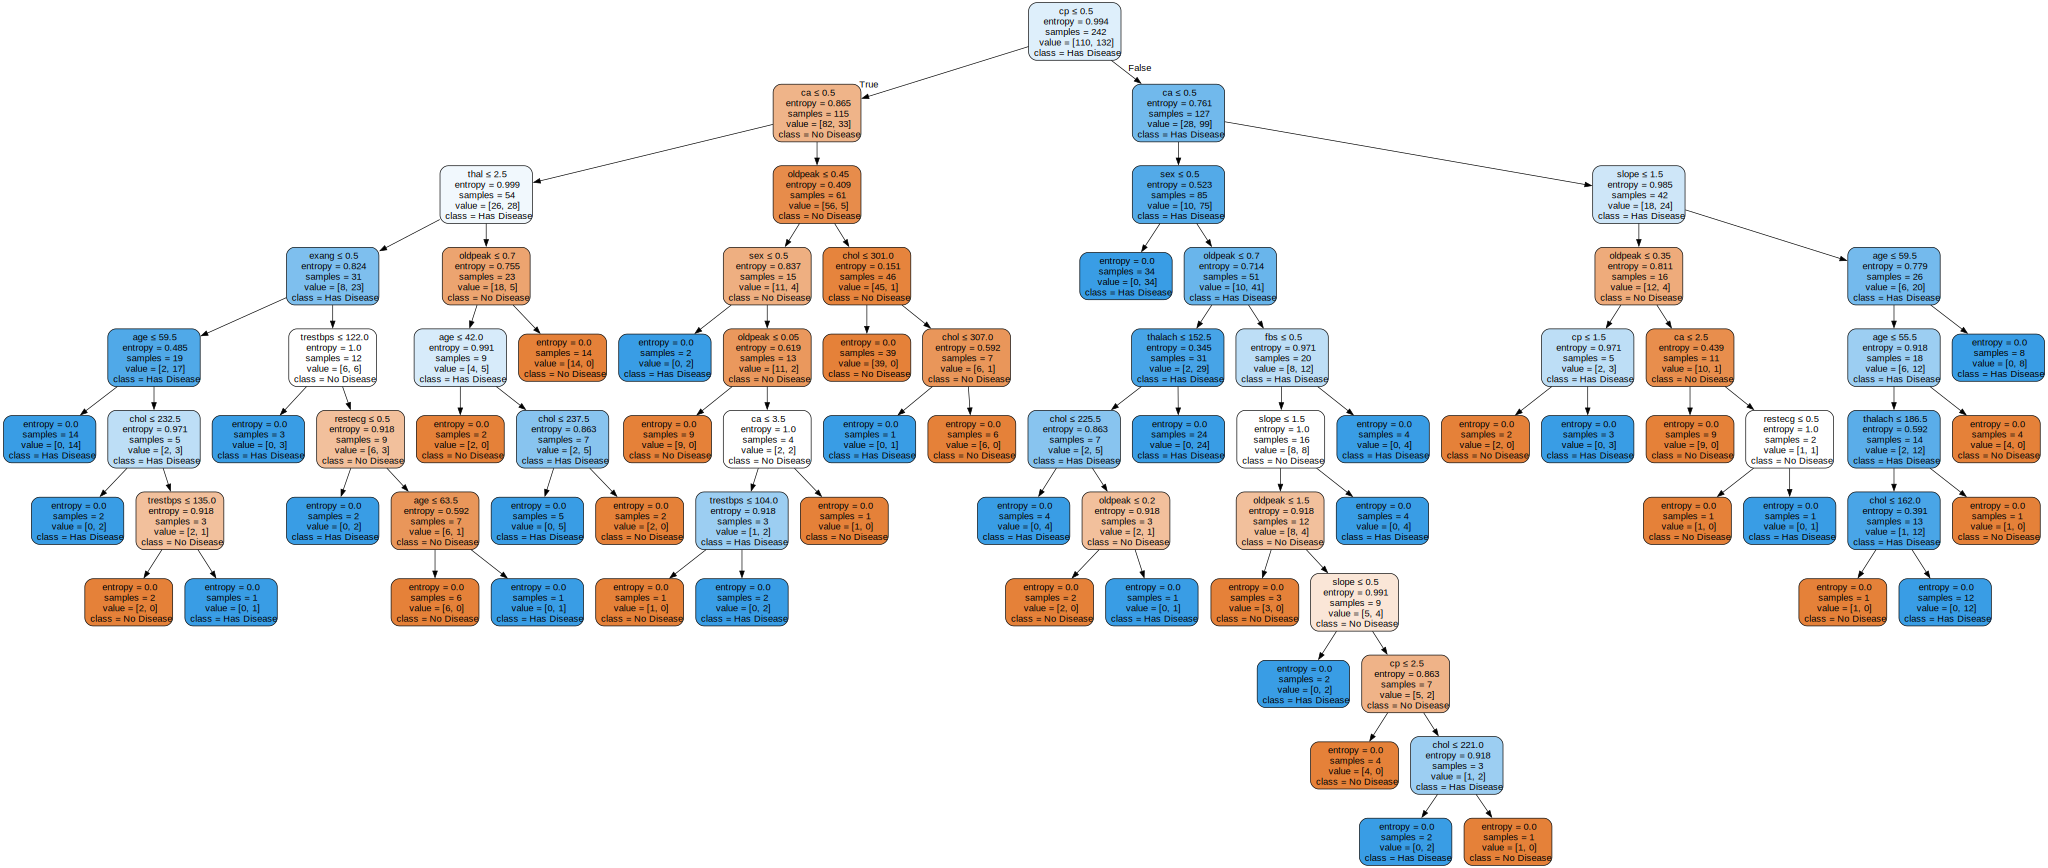

✓ Decision tree (depth=None) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_None.png


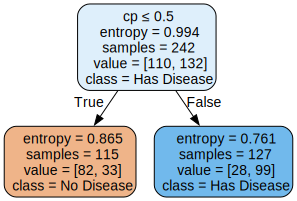

✓ Decision tree (depth=1) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_1.png


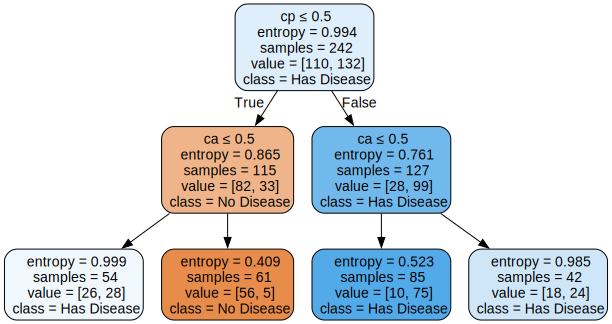

✓ Decision tree (depth=2) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_2.png


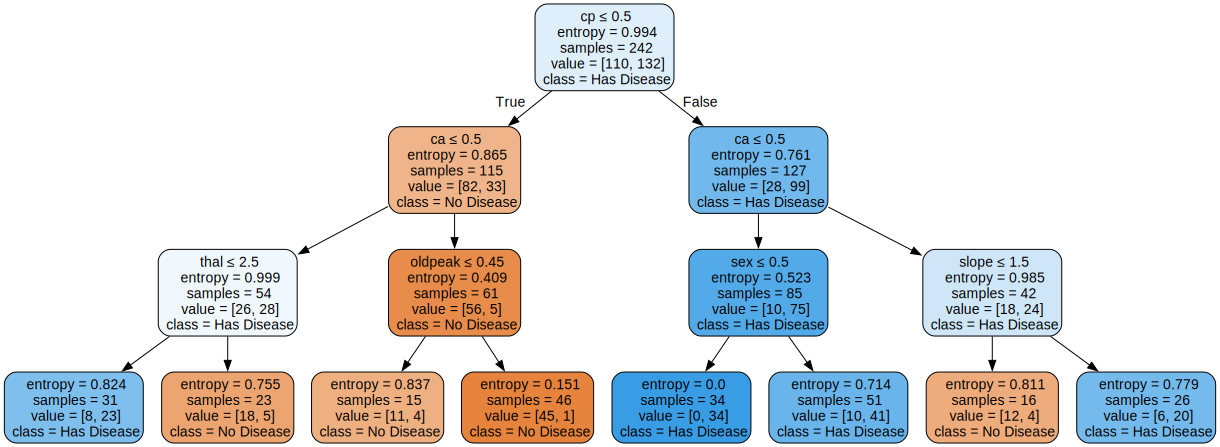

✓ Decision tree (depth=3) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_3.png


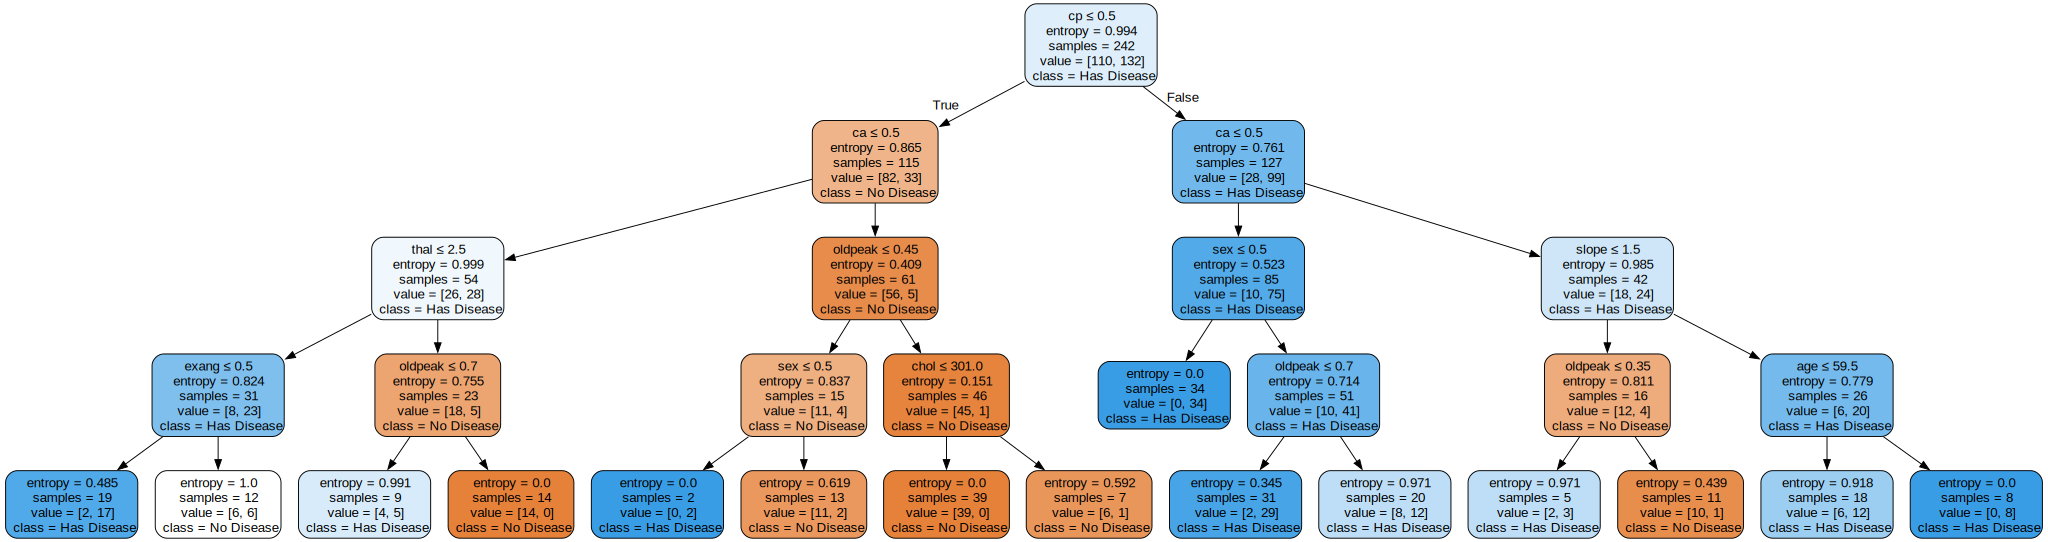

✓ Decision tree (depth=4) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_4.png


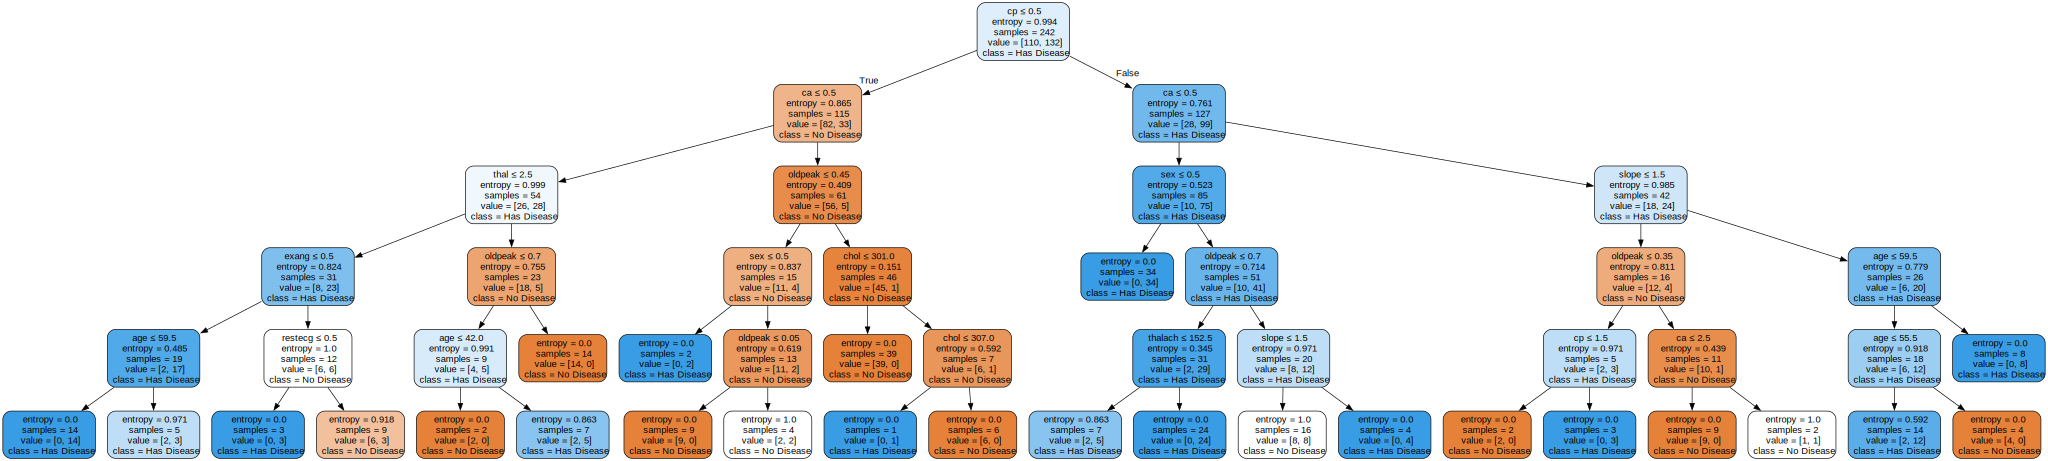

✓ Decision tree (depth=5) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_5.png


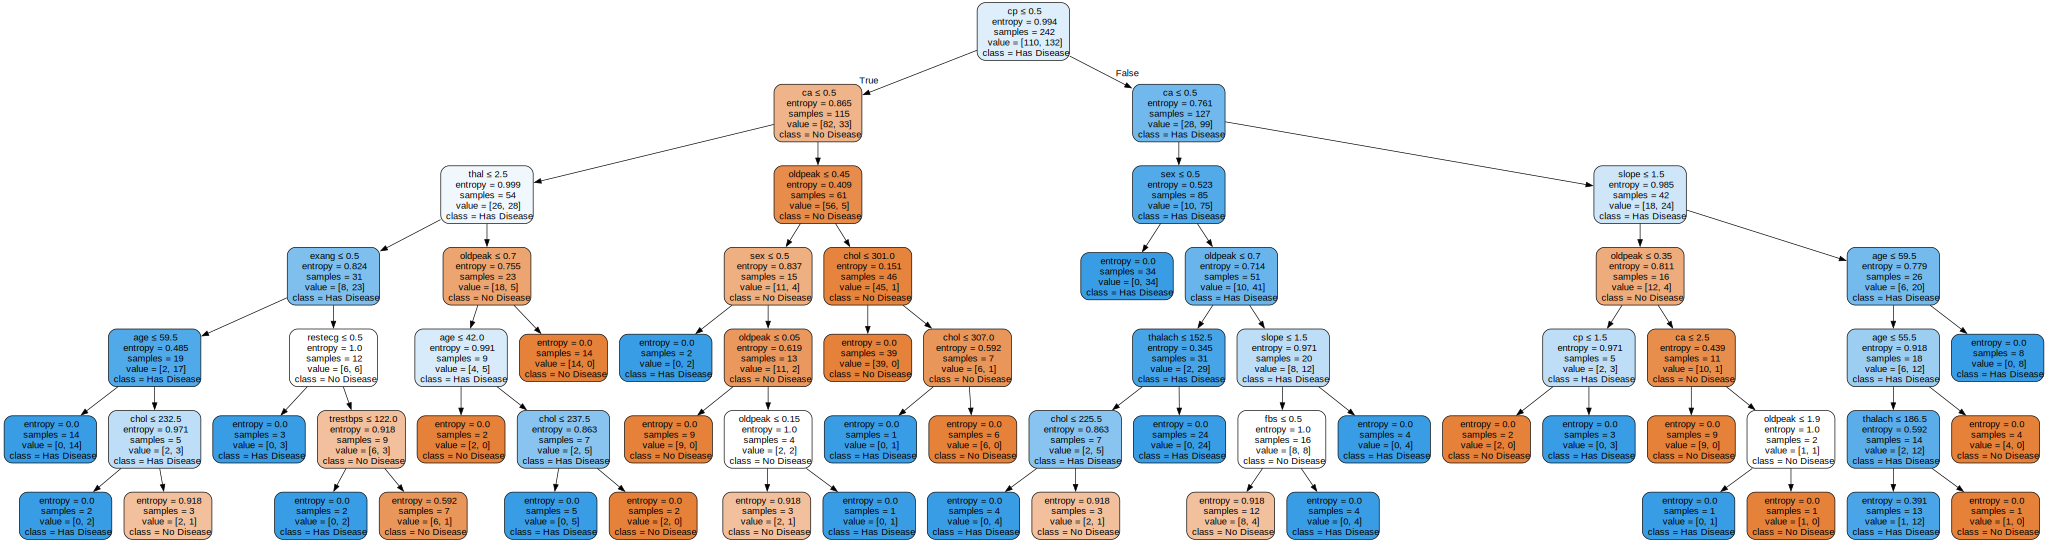

✓ Decision tree (depth=6) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_6.png


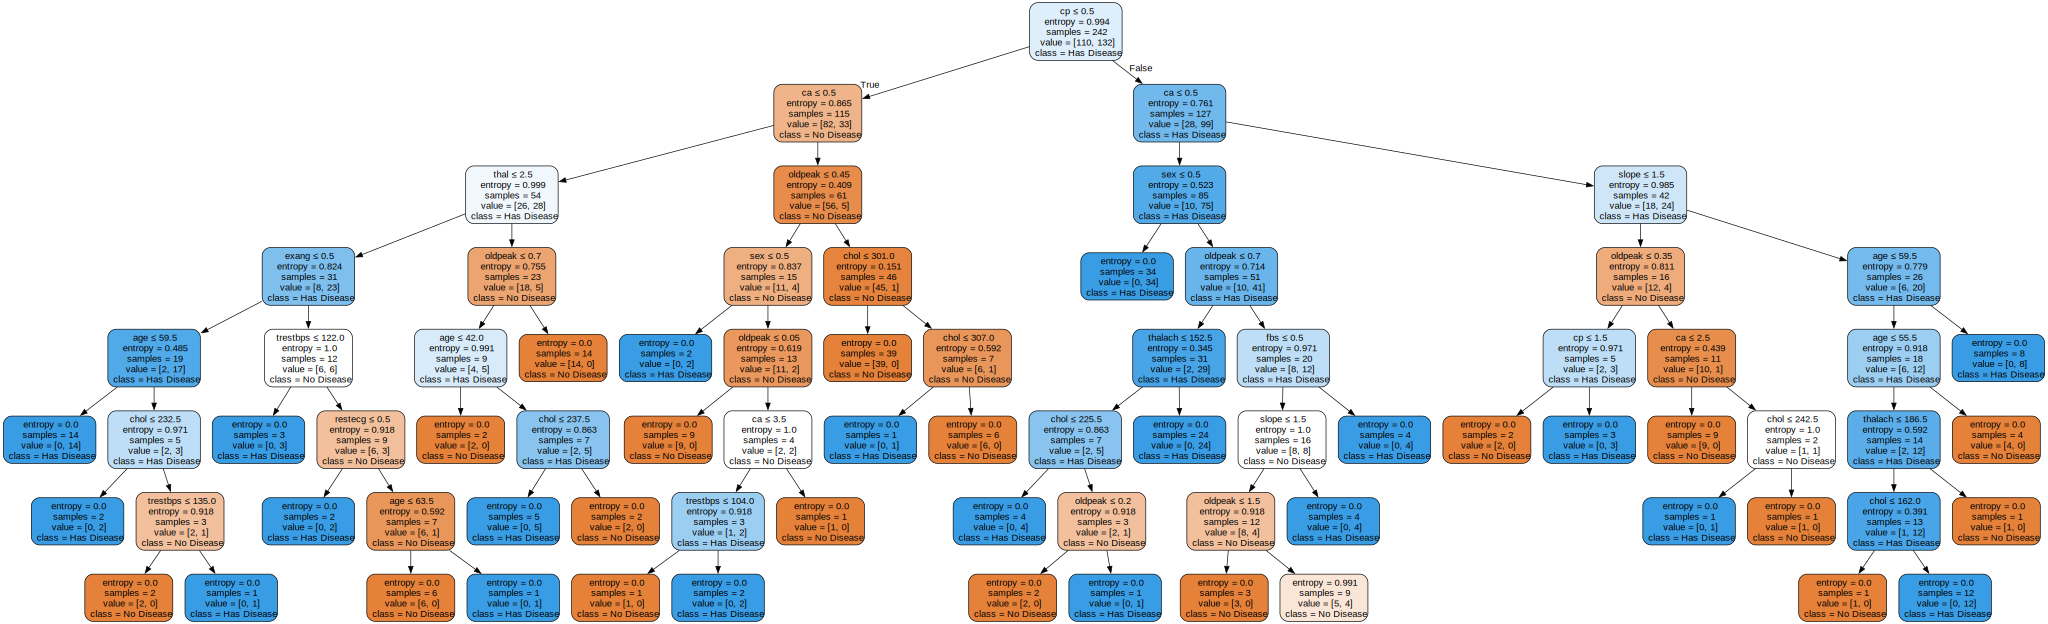

✓ Decision tree (depth=7) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_7.png


In [24]:
export_and_display_trees_by_depth(list_max_depth_model, list_max_depth, features_name, class_name)

## **5.3 Report of decision tree when changing the value of parameter `max_depth`**


In [25]:
def visualize_accuracy_by_depth(accuracy_dict, save_path):
    """
    Trực quan hóa độ chính xác tương ứng với từng giá trị max_depth của Decision Tree.
    Hiển thị bảng và biểu đồ đường để so sánh trực quan hiệu suất mô hình.

    Args:
        accuracy_dict (dict): Từ điển ánh xạ max_depth → accuracy.
        save_path (str): Đường dẫn lưu ảnh biểu đồ kết quả.
    """
    # Chuẩn bị dữ liệu
    max_depths = list(accuracy_dict.keys())
    accuracies = list(accuracy_dict.values())

    # Dữ liệu cho bảng
    table_data = [[str(depth) if depth is not None else "No Limit", f"{acc:.4f}"]
                  for depth, acc in zip(max_depths, accuracies)]

    # Vẽ hình
    plt.figure(figsize=(15, 6))

    # Bảng thống kê
    plt.subplot(1, 2, 1)
    table = plt.table(
        cellText=table_data,
        colLabels=["Max Depth", "Accuracy"],
        loc="center",
        cellLoc="center",
        colWidths=[0.2, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for cell in table.get_celld().values():
        cell.set_height(0.1)

    plt.axis("off")
    plt.title("Bảng độ chính xác")

    # Biểu đồ đường
    plt.subplot(1, 2, 2)
    plot_labels = ["No Limit" if d is None else d for d in max_depths]
    plt.plot(plot_labels, accuracies, marker="o", linestyle="-", color="red")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.title("Biểu đồ Accuracy theo Max Depth")

    plt.suptitle("So sánh độ sâu cây và độ chính xác của Decision Tree")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

    print(f"✓ Accuracy chart saved to: {save_path}")

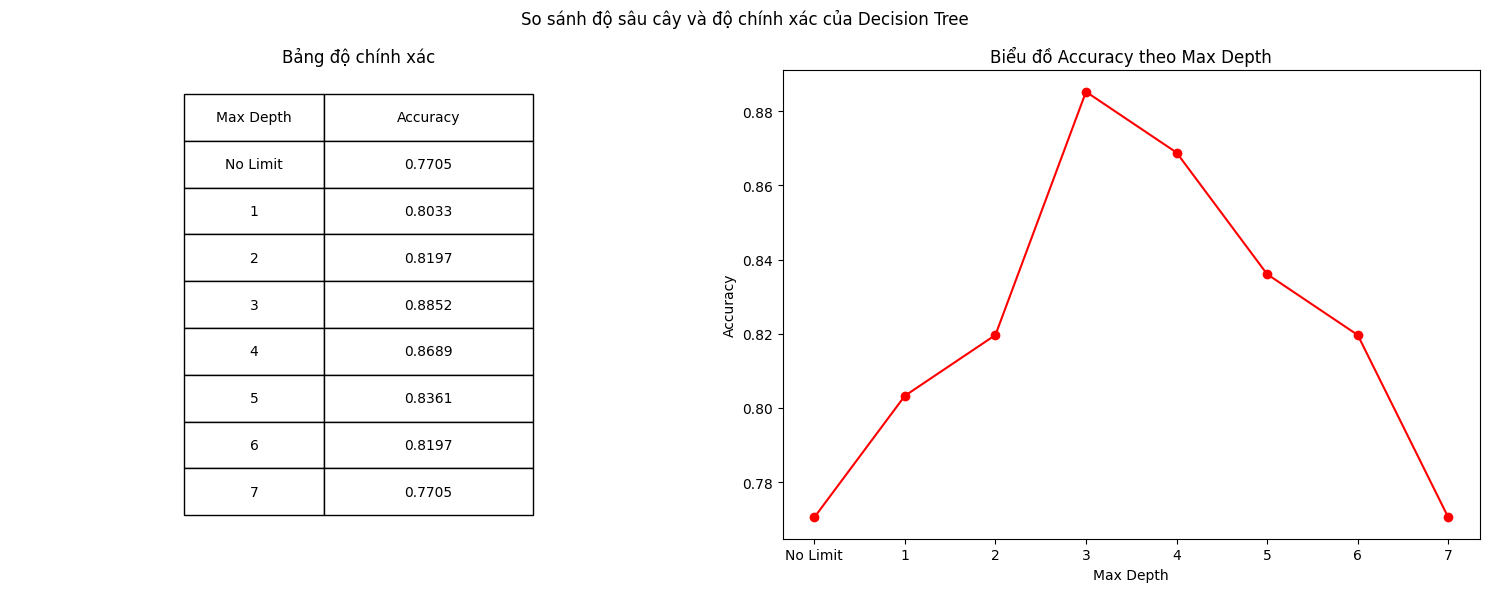

✓ Accuracy chart saved to: output/report/max_depth_ver/accuracy_report.png


In [26]:
output_path = f"output/report/max_depth_ver/accuracy_report.png"
visualize_accuracy_by_depth(accuracy_results, output_path)
